## The Sparks Foundation
## Data Science & Business Analytics Internship - July 2021  
### Kaushal Joshi, Mumbai
#### Task: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### First Steps

In [27]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import seaborn as sns

In [28]:
# loading the dataset
iris = sns.load_dataset("iris")

iris.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization

In [30]:
# Unique values of column 'species'
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:xlabel='species', ylabel='count'>

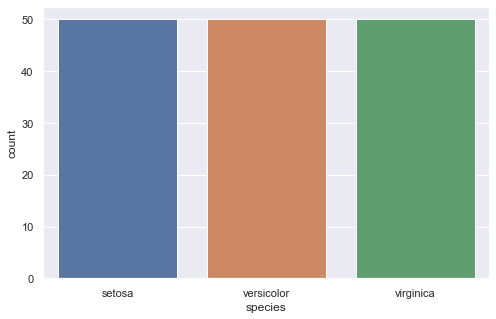

In [31]:
# Countploting 'species' column

sns.set(rc={"figure.figsize":(8, 5)})
sns.countplot(x=iris['species'])

<AxesSubplot:xlabel='species', ylabel='petal_width'>

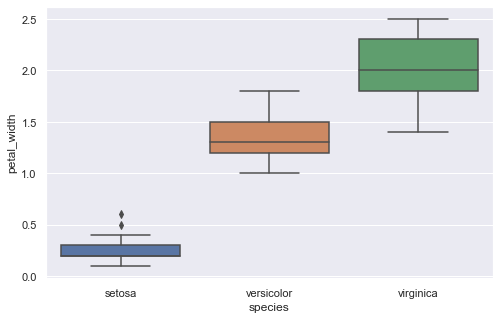

In [32]:
# Boxpplotting 'species' column

sns.set(rc={"figure.figsize":(8, 5)})
sns.boxplot(x='species', y='petal_width', data=iris)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

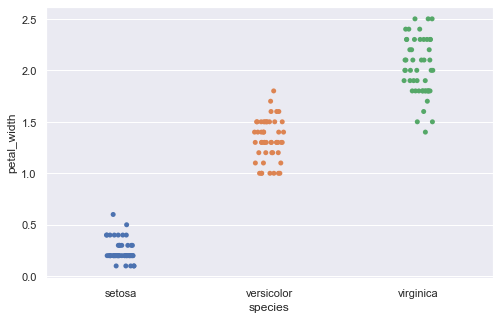

In [33]:
# Striplotting 'species' column

sns.set(rc={"figure.figsize":(8, 5)})
sns.stripplot(x='species', y='petal_width', data=iris)

### Finding K-Means Classification

In [34]:
# Finding optimum number of clusters
x = iris.iloc[:,[0,1,2,3]].values

In [35]:
# Creating Regression Model
# WCSS stands for 'Within Cluster Sum of Squares'
wcss = []

for i in range(1, 11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

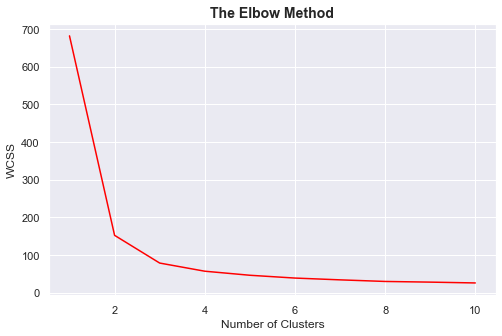

In [36]:
# Plotting Line Graph

plt.figure(figsize=(8,5))
plt.plot( range(1,11), wcss, color ='Red' )
plt.title("The Elbow Method", fontsize=14, fontweight = 'bold')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# Applying kmeans to the dataset

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

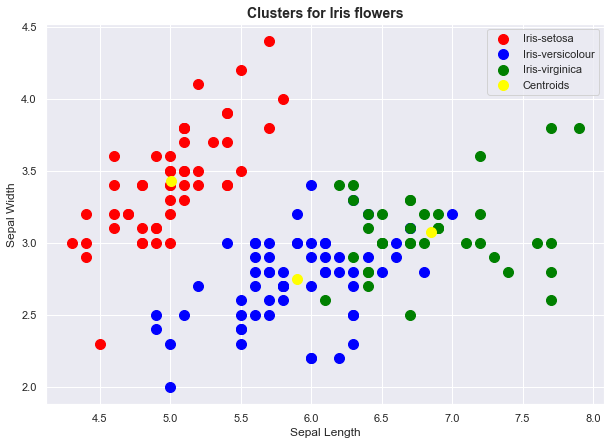

In [38]:
# Visualising the clusters - On the first two columns

plt.figure(figsize=(10,7))


plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')


plt.title('Clusters for Iris flowers', fontsize=14, fontweight = 'bold')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend()
plt.show()